## DS4200 Visualizations

### Srihari Raman


In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
alt.data_transformers.enable("vegafusion")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


DataTransformerRegistry.enable('vegafusion')

In [2]:
df = pd.read_csv("/Users/srihariraman/PycharmProjects/EV-Vizualization/data/Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


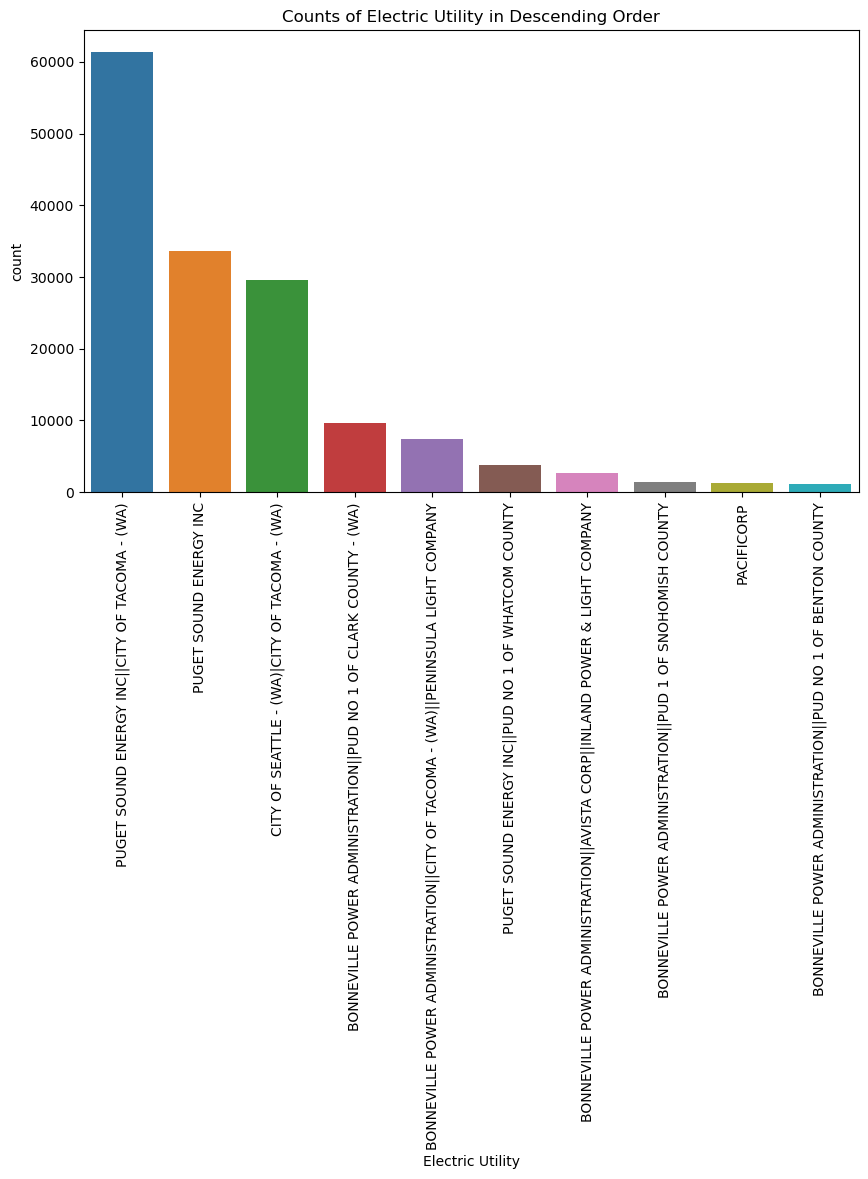

In [4]:
counts = df['Electric Utility'].value_counts().sort_values(ascending=False).head(10)
ordered_index = counts.index

# Step 2: Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Electric Utility', order=ordered_index)
plt.xticks(rotation=90)
plt.title('Counts of Electric Utility in Descending Order')
plt.show()

In [11]:
counts = df['Electric Utility'].value_counts().reset_index()
counts.columns = ['Electric Utility', 'Count']  # Rename columns appropriately
counts = counts.sort_values(by='Count', ascending=False).head(10)  # Ensure it's sorted in descending order

In [15]:
alt.Chart(counts).mark_bar().encode(
    x=alt.X('Electric Utility:N', sort='-y'),  # Specify nominal data and sort bars based on the counts in descending order
    y=alt.Y('Count:Q'),  # Quantitative scale for counts
    color=alt.Color('Count:Q'),
    tooltip=['Electric Utility', 'Count']  # Optional: show tooltip on hover
).properties(
    width=600,  # Adjust the width as needed
    height=400,  # Adjust the height as needed
    title='Top 10 Electric Utility Firms Used in WA')

alt.Chart(...)